<a href="https://colab.research.google.com/github/WooJungE/About_data/blob/main/20230413.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

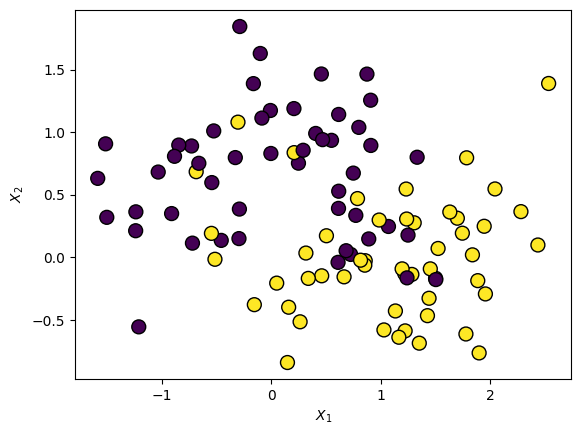

In [6]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def get_moon_data():
  X, y = make_moons(n_samples = 150, noise = 0.4, random_state = 42)
  X_train, X_test, y_train, y_test = \
  train_test_split(X, y, test_size = .33, random_state = 42)
  return [X_train, X_test, y_train, y_test]

X_train, X_test, y_train, y_test = get_moon_data()

plt.scatter(X_train[:, 0], X_train[:, 1], marker = 'o', c=y_train, s=100, edgecolor='k')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = get_moon_data()

clf = LogisticRegression(penalty = 'l2', C = 0.5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

f1 = f1_score(y_test, y_pred)
print("f1 score is = ", str(f1))

f1 score is =  0.7499999999999999


In [8]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = get_moon_data()
clf = SVC(kernel = 'linear', C=0.5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred)
print("f1 score is = " + str(f1))

f1 score is = 0.7499999999999999


In [10]:
clf2 = SVC(gamma=2, C=1)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
f1 = f1_score(y_test, y_pred)
print("f1 score is = " + str(f1))

f1 score is = 0.782608695652174


In [12]:
def get_moon_data(noise) :
  X, y = make_moons(n_samples = 150, noise = noise, random_state = 42)
  X_train, X_test, y_train, y_test = \
  train_test_split(X, y, test_size = .33, random_state = 42)
  return [X_train, X_test, y_train, y_test]

rng = [x / 10 for x in range(1, 10)]
f1_list = list()
f1_list2 = list()

for noise in rng:
  X_train, X_test, y_train, y_test = get_moon_data(noise)

  clf = SVC(kernel = 'linear', C=1)
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)
  f1_list.append(f1_score(y_test, y_pred))
  
  clf2 = SVC(gamma = 2, C =1)
  clf2.fit(X_train, y_train)

  y_pred = clf2.predict(X_test)
  f1_list2.append(f1_score(y_test, y_pred))

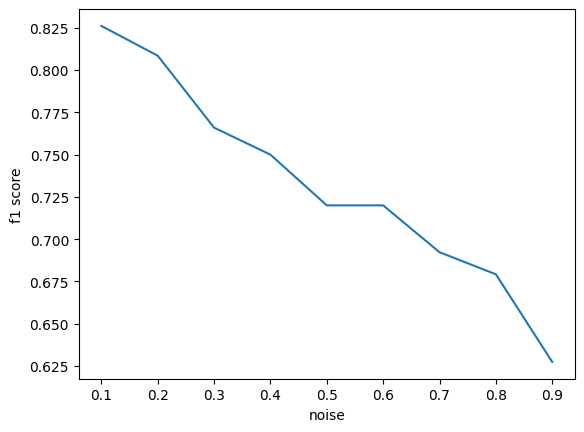

In [14]:
import matplotlib.pyplot as plt
plt.plot(rng, f1_list, label = 'linear')
plt.xlabel('noise')
plt.ylabel('f1 score')
plt.show()

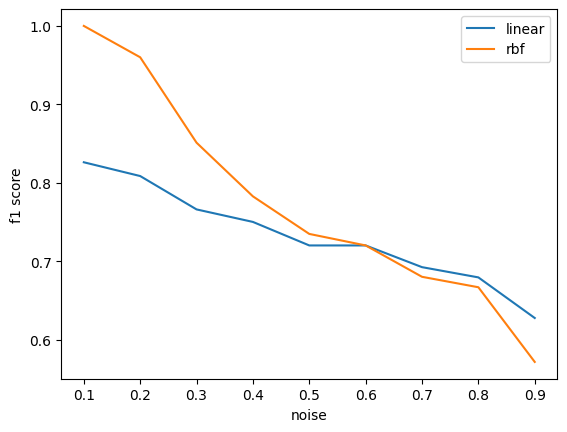

In [15]:
import matplotlib.pyplot as plt
plt.plot(rng, f1_list, label = 'linear')
plt.xlabel('noise')
plt.ylabel('f1 score')
plt.plot(rng, f1_list2, label='rbf')
plt.legend(loc = 'upper right')
plt.show()